<h1><center>Data Analysis Project</center></h1>

<h1><center>Esports Industry<center></h1>

**Used Dataset** - Variation in Esports Earnings during the time period 1998-2021. 
<br>
[Dataset Link](https://www.kaggle.com/rankirsh/esports-earnings)

The esports industry has gained a lot of attention in the last two decades and gained some reputation as a full time profession in a lot of countries. This kind of rise brings along a lot of money into the frame as well.
<br>
We will be using a couple of datasets here to analyse what changes all this hype brought into the esports industry and what could actually be the future of the industry.

The data we'll be using originally classifies the earnings, the player count and the number of tournaments according to individual game titles.

However, on the other hand, we have some month-wise data from the same period showing the earnings for different games.

# Data Description

### File-1

The starting file we will be using consists of 7 different columns.
<br>
We'll be describing each one of them briefly here-
<br>
- **Game** - The title of the game discussed in any specific row.
- **ReleaseDate** - The year in which the game was released.
- **Genre** - The genre or category the game belongs to.
- **TotalEarnings** - The total earnings the game has generated through esports till the date of updation of the dataset(End of the year 2021).
- **OnlineEarnings** - The earnings generated through online only tournaments.
- **TotalPlayers** - The total number of players who have participated in the tournaments organized for any particular game.
- **TotalTournaments** - The total number of tournaments that have been organized for any particular game.

### File-2

The second file has 5 different columns as explained below:-
- **Date** - The month being discussed for any specific game.
- **Game** - The game being discussed about in that specific month.
- **Earnings** - Total earnings generated by the game in any specific month through esports.
- **Players** - Number of players involved in the tournaments for the game in any specific month.
- **Tournaments** - The number of tournaments organized in the month mentioned for any specific game.

## Importing the Libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## The first dataset

In [2]:
esports1 = pd.read_csv('esports_1.csv')
esports1.head(10)

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2280004.90,720999.87,1508,1107
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,75765.25,217.00,115,56
4,Age of Empires Online,2011,Strategy,5283.56,775.00,22,16
5,Age of Mythology,2002,Strategy,100551.00,52000.00,129,121
6,Among Us,2018,Strategy,86000.00,0.00,14,8
7,Auto Chess,2019,Strategy,1143720.28,1037122.28,123,36
8,Brawl Stars,2018,Strategy,2557950.00,1336250.00,215,31
9,Chess.com,2007,Strategy,1826564.33,0.00,771,272


In [3]:
esports1.describe()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
count,552.000000,5.520000e+02,5.520000e+02,552.00000,552.000000
mean,2011.463768,2.058826e+06,1.523955e+06,201.29529,86.521739
std,7.104263,1.479923e+07,1.237805e+07,860.77385,438.011063
min,1981.000000,0.000000e+00,0.000000e+00,0.00000,0.000000
25%,2007.000000,1.028783e+03,0.000000e+00,5.00000,1.000000
50%,2013.000000,3.600856e+04,1.336260e+04,21.00000,5.000000
75%,2017.000000,2.227467e+05,1.417517e+05,101.50000,28.000000
max,2021.000000,2.769642e+08,2.552828e+08,14586.00000,6276.000000


In [4]:
esports1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              552 non-null    object 
 1   ReleaseDate       552 non-null    int64  
 2   Genre             552 non-null    object 
 3   TotalEarnings     552 non-null    float64
 4   OnlineEarnings    552 non-null    float64
 5   TotalPlayers      552 non-null    int64  
 6   TotalTournaments  552 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 30.3+ KB


In [5]:
esports1.columns

Index(['Game', 'ReleaseDate', 'Genre', 'TotalEarnings', 'OnlineEarnings',
       'TotalPlayers', 'TotalTournaments'],
      dtype='object')

In [6]:
esports1.corr()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
ReleaseDate,1.000000,0.036510,0.022660,0.023291,-0.017583
TotalEarnings,0.036510,1.000000,0.975722,0.689147,0.519354
OnlineEarnings,0.022660,0.975722,1.000000,0.594118,0.462973
TotalPlayers,0.023291,0.689147,0.594118,1.000000,0.770754
TotalTournaments,-0.017583,0.519354,0.462973,0.770754,1.000000


As we can see, there is a minimal but negative correlation between the 'ReleaseDate' and 'TotalTournaments'.
<br>
Other facts to be noted are-
<br>
- Earnings generated through esports are highly correlated to the number of players participating or vice versa.
- As expected, we can see a similar kind of correlation between the no. of tournaments and the no. of players.

In [7]:
esports1.isnull().sum()

Game                0
ReleaseDate         0
Genre               0
TotalEarnings       0
OnlineEarnings      0
TotalPlayers        0
TotalTournaments    0
dtype: int64

So, as we can see, there are no null values in this dataset.

Let's start by sorting the data according to the release date of the game.

In [8]:
datewise = esports1.sort_values(by = 'ReleaseDate')
datewise.reset_index(inplace = True, drop = True)
datewise

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Pac-man,1981,Puzzle Game,0.00,0.00,0,0
1,Tetris,1989,Puzzle Game,42515.99,16633.17,67,28
2,Teenage Mutant Ninja Turtles: Tournament Fighters,1993,Fighting Game,820.00,820.00,7,2
3,NHL '94,1993,Sports,3818.56,3818.56,25,8
4,Fighter's History Dynamite,1994,Fighting Game,195.00,195.00,3,1
...,...,...,...,...,...,...,...
547,Melty Blood: Type Lumina,2021,Fighting Game,2004.59,2004.59,8,1
548,Guilty Gear -STRIVE-,2021,Fighting Game,86150.62,35157.30,119,33
549,Lemnis Gate,2021,First-Person Shooter,572.86,0.00,5,4
550,Virtua Fighter 5: Ultimate Showdown,2021,Fighting Game,1000.00,0.00,13,2


Now, we will be calculating the total earnings generated through esports in each year.

In [9]:
earnings = datewise.groupby('ReleaseDate')[['TotalEarnings', 'OnlineEarnings']].sum()
earnings

,TotalEarnings,OnlineEarnings
ReleaseDate,,
1981,0.000000e+00,0.000000e+00
1989,4.251599e+04,1.663317e+04
1993,4.638560e+03,4.638560e+03
1994,3.502748e+04,3.162961e+04
1995,1.350119e+04,3.421190e+03
1996,1.064964e+05,9.948544e+04
1997,3.412037e+05,3.050886e+05
1998,8.603489e+06,8.168257e+06
1999,3.796988e+06,2.221493e+06


<a id='earnings1'></a>

Text(0, 0.5, 'Total Earnings (in 100M)')

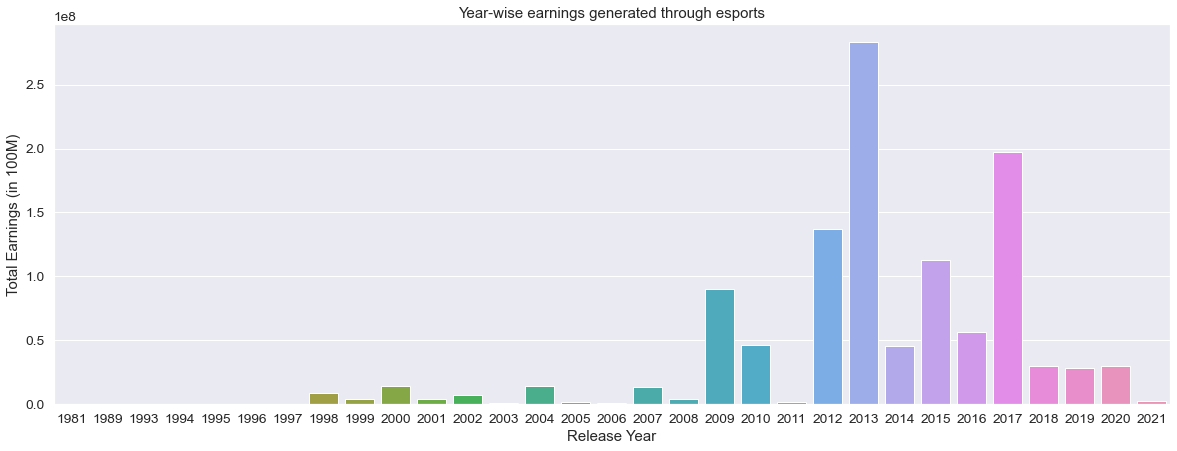

In [57]:
plt.figure(figsize = (20, 7))
plt.title('Year-wise earnings generated through esports')
sns.set(font_scale = 1.25)
sns.barplot(x = earnings.index, y = earnings.TotalEarnings)
plt.xlabel('Release Year')
plt.ylabel('Total Earnings (in 100M)')

Text(0, 0.5, 'Total Online Earnings (in 100M)')

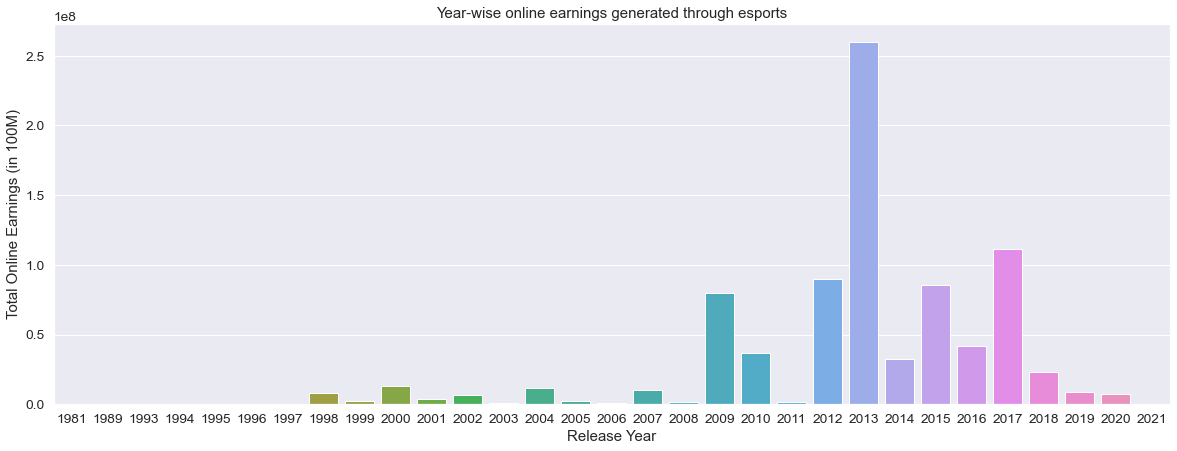

In [11]:
plt.figure(figsize = (20, 7))
plt.title('Year-wise online earnings generated through esports')
sns.set(font_scale = 1.25)
sns.barplot(x = earnings.index, y = earnings.OnlineEarnings)
plt.xlabel('Release Year')
plt.ylabel('Total Online Earnings (in 100M)')

As we can see, the year 2013 generated the maximum earnings, so let's see what were the games released in that year.

In [12]:
esports1.Game[esports1.ReleaseDate == 2013]

14                     Company of Heroes 2
61                           Battlefield 4
79                    Call of Duty: Ghosts
124                     MechWarrior Online
146           S.K.I.L.L. - Special Force 2
149                       ShootMania Storm
163                                Warface
174                                 Dota 2
193                   Old School Runescape
202          Arcana Heart 3: LOVE MAX!!!!!
205           Attack on Titan Tribute Game
218    Chaos Code: New Sign of Catastrophe
221               Dead or Alive 5 Ultimate
229                               Divekick
255               Injustice: Gods Among Us
258                 Killer Instinct (2013)
287                Persona 4 Arena Ultimax
319              Soul Calibur II HD Online
355                   TowerFall: Ascension
409             RaceRoom Racing Experience
411                              rFactor 2
415                  TrackMania 2: Stadium
416                   Trackmania 2: Valley
423        

We are going to check the contribution of all the games released in 2013 in the total earnings.

In [13]:
gamewise = esports1[['Game', 'TotalEarnings']][esports1.ReleaseDate == 2013].groupby('Game')[['TotalEarnings']].sum()
gamewise.sort_values(by = 'TotalEarnings', ascending = False, inplace = True)
gamewise

,TotalEarnings
Game,
Dota 2,2.769642e+08
Call of Duty: Ghosts,1.594185e+06
rFactor 2,1.531318e+06
Turbo Racing League,1.000000e+06
Old School Runescape,4.375042e+05
ShootMania Storm,2.620907e+05
Battlefield 4,2.457665e+05
Killer Instinct (2013),2.249870e+05
RaceRoom Racing Experience,2.195712e+05


Let's plot the top-10 games from this category.

Text(0.5, 0, 'Total Earnings (100M)')

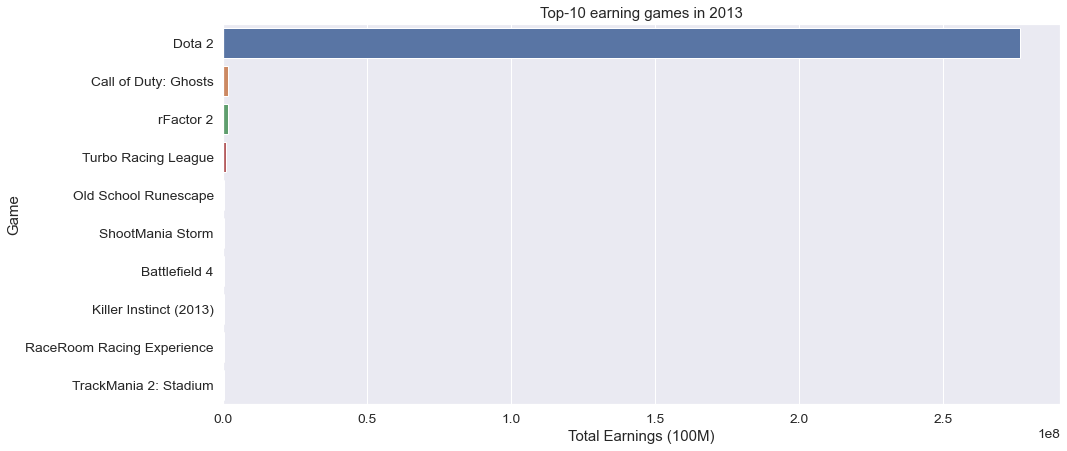

In [14]:
plt.figure(figsize = (15, 7))
plt.title('Top-10 earning games in 2013')
sns.barplot(x = gamewise.head(10).TotalEarnings, y = gamewise.head(10).index)
plt.xlabel('Total Earnings (100M)')

So, the earnings generated by Dota-2 are way higher compared to other games.

## We will now see how the earnings are distributed based on the genres of the games.

In [15]:
genrewise = esports1.groupby('Genre')[['TotalEarnings', 'OnlineEarnings']].sum()
genrewise.sort_values(by = 'TotalEarnings', ascending = False, inplace = True)
genrewise

,TotalEarnings,OnlineEarnings
Genre,,
Multiplayer Online Battle Arena,4.400303e+08,3.963505e+08
First-Person Shooter,2.962311e+08,1.980499e+08
Battle Royale,1.954692e+08,1.030507e+08
Strategy,7.703558e+07,5.633666e+07
Collectible Card Game,4.161247e+07,2.899262e+07
Sports,3.674690e+07,2.122819e+07
Fighting Game,2.367769e+07,2.110670e+07
Racing,1.167363e+07,5.845150e+06
Role-Playing Game,8.411453e+06,5.927244e+06


<AxesSubplot:title={'center':'Earnings generated through different genres'}, xlabel='TotalEarnings', ylabel='OnlineEarnings'>

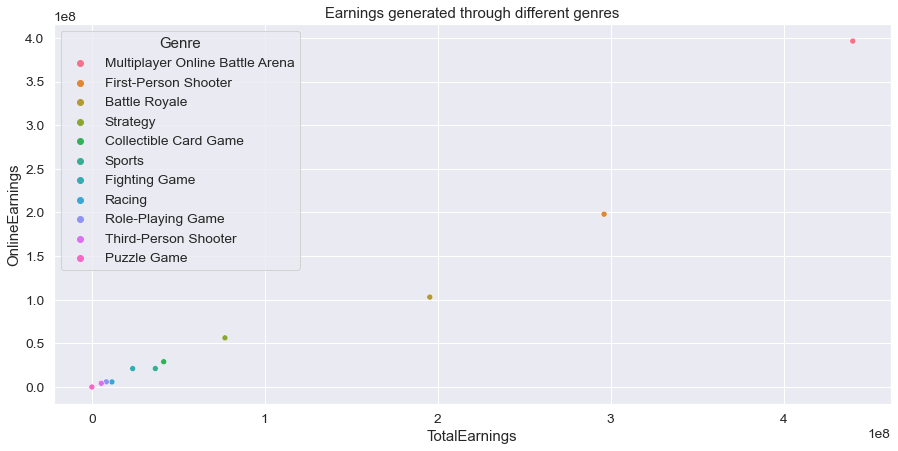

In [16]:
plt.figure(figsize = (15, 7))
plt.title('Earnings generated through different genres')
sns.scatterplot(x = genrewise.TotalEarnings, y = genrewise.OnlineEarnings, hue = genrewise.index)

We'll work on analysing the pattern how the earnings varied along the years based on the genres.

In [17]:
date_and_genre = esports1.groupby(['ReleaseDate', 'Genre'])[['TotalEarnings', 'OnlineEarnings']].sum()
date_and_genre

TotalEarnings  OnlineEarnings
ReleaseDate Genre                                                         
1981        Puzzle Game                               0.00            0.00
1989        Puzzle Game                           42515.99        16633.17
1993        Fighting Game                           820.00          820.00
            Sports                                 3818.56         3818.56
1994        Fighting Game                         24517.45        24517.45
...                                                    ...             ...
2021        Multiplayer Online Battle Arena      845000.00       500000.00
            Racing                               750000.00            0.00
            Sports                                28622.56        28622.56
            Strategy                              75765.25          217.00
            Third-Person Shooter                      0.00            0.00

[170 rows x 2 columns]

In [18]:
esports1.Genre.nunique()

11

<a id = 'strategy1plot'></a>

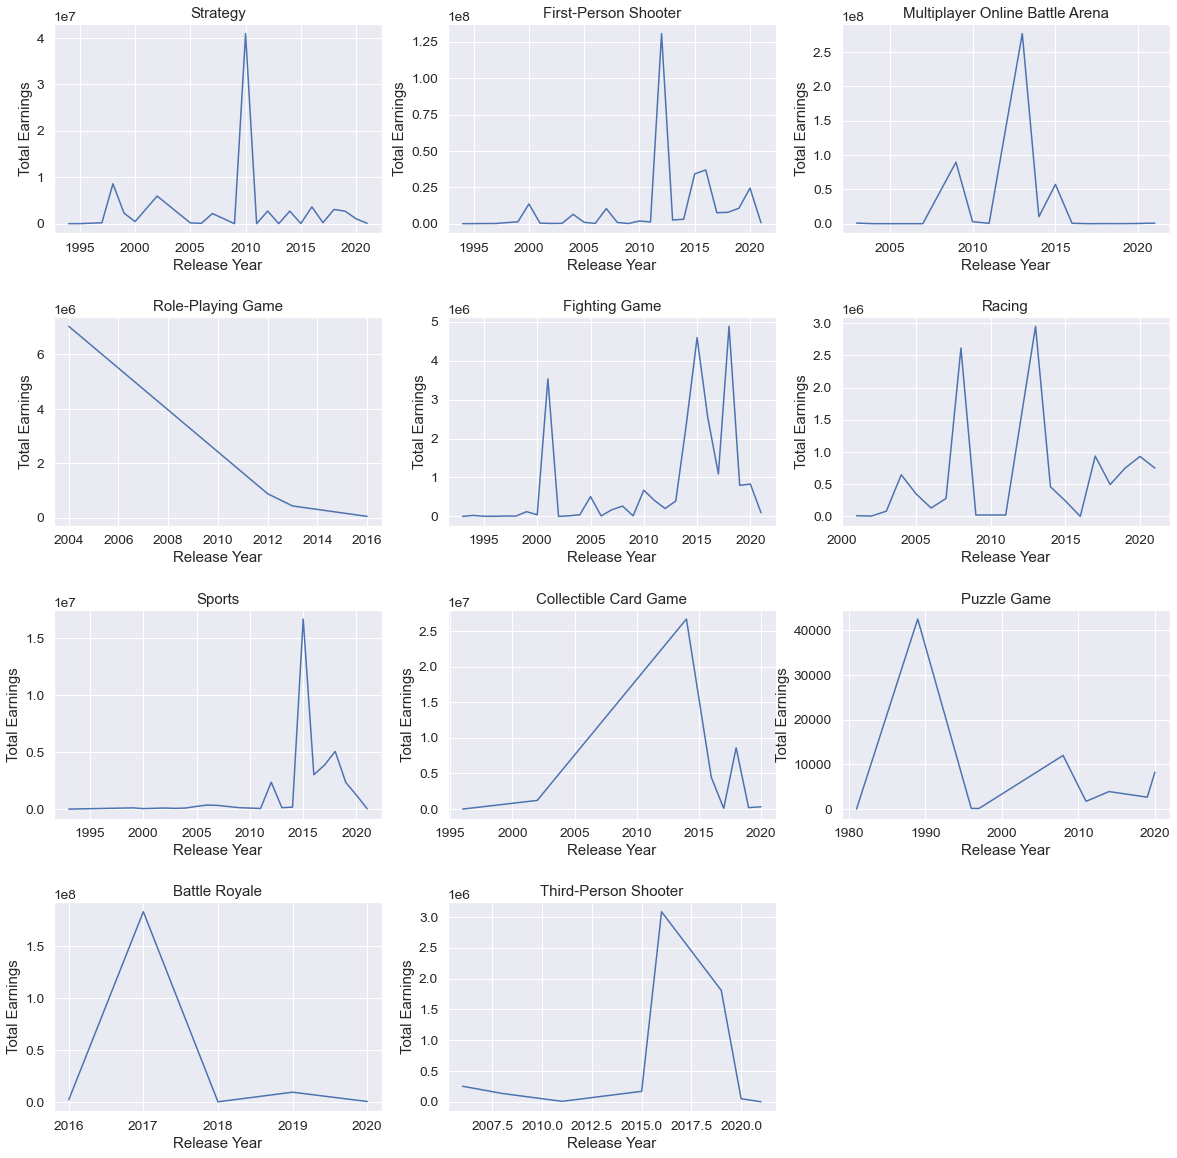

In [19]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
fig.delaxes(axes[3][2])
genre = 0
for axis in axes:
    for i in axis:
        try:
            df = date_and_genre.xs(esports1.Genre.unique()[genre], level = 'Genre')
            i.plot(df.index, df.TotalEarnings)
            i.set_title(esports1.Genre.unique()[genre])
            i.set_xlabel('Release Year')
            i.set_ylabel('Total Earnings')
            genre += 1
        except:
            continue
plt.subplots_adjust(hspace = 0.4)

We have gathered the following key points about each of the genres from the plots:-
<br>
- **Strategy** - The games based on *strategy* actually came into play in the esports industry around the year 2000 and reached the peak in 2010. However, after the early 2010s, the earnings dropped down exponentially and continued along the same range since then.
<br><br>
- **FPS(First Person Shooter)** - FPS games had a similar pattern as that of the Strategy games in terms of earnings generated. It peaked between 2010 and 2015 and then dropped down. The drop is lesser than the Strategy games though.
<br><br>
- **MOBA(Multiplayer Online Battle Arena)** - The *MOBA* games started rising in terms of earnings between 2005 and 2010, hit their peaks between 2010 and 2015 dropped and flattened out around 2016.
<br><br>
- **RPG(Role-Playing Games)** - The *RPG* games came into play in 2004 and hit the peak at that exact period of time and kept going down till the earnings almost reached null till 2016.
<br><br>
- **Fighting Game** - The *Fighting* games originated before 1995 and saw an actual growth in the earnings around 2001 which was followed by a drop till 2015 which saw a huge hike in the earnings and the peak was reached around 2018-19.
<br><br>
- **Racing** - The *Racing* games originated in the early 2000s and saw uneven hikes till 2007. The earnings went down around 2010 and reached the peak around 2013 after another hike around 2011. Since then, the racing genre has been going through an uneven raise and dip in the earnings.
<br><br>
- **Sports** - The *Sports* games originated before 1995 but saw no considerable hikes in the earnings till 2015 and have been going down unevenly since then.
<br><br>
- **Collectible Card Game** - Originated after 1995 and saw a gradual linear growth in the earnings from around 2002 to around 2015. The earnings dropped after this unevenly.
<br><br>
- **Puzzle Game** - These games originated around 1980 and saw an immediate rise and reached the peak around 1990. However, the peak in earnings for *puzzle* games was quite low as compared to other games and they haven't seen any major rises since then either.
<br><br>
- **Battle Royale** - *Battle Royales* came into play in 2016 and reached the peak in 2017 with the highest earnings after MOBA. The earnings flattened out after 2018.
<br><br>
- **Third-person Shooter** - These came into play befoer 2007 but saw an actual rise in the earnings after 2015. The earnings lowered down gradually after that.
<br><br><br>

<div class="alert alert-block alert-info">
<b>Note:</b>This data is based on the release date of the games. So, this won't saw the total earnings generated by and game or any genre but only the earnings generated in the year of release of the games.</div>

Now, we'll bring the second dataset into action and use the combined forms of both where needed.

In [20]:
esports2 = pd.read_csv('esports_2.csv')
esports2.head(10)

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-07-01,Quake II,15000.0,5,1
3,1998-07-01,QuakeWorld,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2
5,1998-11-01,QuakeWorld,22000.0,0,1
6,1998-11-01,StarCraft: Brood War,20000.0,8,1
7,1998-12-01,Age of Empires,2000.0,1,1
8,1999-03-01,Quake II,15000.0,5,1
9,1999-04-01,StarCraft: Brood War,3000.0,2,1


In [21]:
esports2.describe()

,Earnings,Players,Tournaments
count,7.316000e+03,7316.000000,7316.000000
mean,1.554512e+05,53.230044,6.521460
std,1.027665e+06,120.838962,12.179359
min,0.000000e+00,0.000000,1.000000
25%,9.327675e+02,5.000000,1.000000
50%,8.808505e+03,15.000000,2.000000
75%,5.627753e+04,44.000000,6.000000
max,4.012570e+07,1709.000000,172.000000


The standard deviation for the no. of players participating is high in this dataset too just like the frist one.

In [22]:
esports2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         7316 non-null   object 
 1   Game         7316 non-null   object 
 2   Earnings     7316 non-null   float64
 3   Players      7316 non-null   int64  
 4   Tournaments  7316 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 285.9+ KB


In [23]:
esports2.columns

Index(['Date', 'Game', 'Earnings', 'Players', 'Tournaments'], dtype='object')

In [24]:
esports2.corr()

,Earnings,Players,Tournaments
Earnings,1.000000,0.324325,0.174388
Players,0.324325,1.000000,0.737691
Tournaments,0.174388,0.737691,1.000000


In [25]:
esports2.isnull().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64

#### The first thing we'll do about this dataset is that we'll convert the 'Date' column into datetime format using the to_datetime function.

In [26]:
esports2.Date = pd.to_datetime(esports2.Date)
esports2

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-07-01,Quake II,15000.0,5,1
3,1998-07-01,QuakeWorld,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2
...,...,...,...,...,...
7311,2021-12-01,Auto Chess,1300.0,5,4
7312,2021-12-01,Quake Live,1000.0,6,1
7313,2021-12-01,Quake Champions,911.0,16,1
7314,2021-12-01,Age of Mythology,300.0,4,1


In [27]:
esports2.Date

0      1998-01-01
1      1998-05-01
2      1998-07-01
3      1998-07-01
4      1998-11-01
          ...    
7311   2021-12-01
7312   2021-12-01
7313   2021-12-01
7314   2021-12-01
7315   2021-12-01
Name: Date, Length: 7316, dtype: datetime64[ns]

# Let's start by generating some basic inferences from this data. Later, we'll be working with both the datasets together.

### Total earnings generated in the year 1998.

In [28]:
esports2[esports2.Date.dt.year == 1998]['Earnings'].sum()

131700.0

### The pattern in the earnings over the years.

In [29]:
esports2['Year'] = esports2.Date.dt.year
esports2['Month'] = esports2.Date.dt.month
esports2

,Date,Game,Earnings,Players,Tournaments,Year,Month
0,1998-01-01,QuakeWorld,15000.0,8,1,1998,1
1,1998-05-01,Quake II,14600.0,4,1,1998,5
2,1998-07-01,Quake II,15000.0,5,1,1998,7
3,1998-07-01,QuakeWorld,6500.0,4,1,1998,7
4,1998-11-01,Quake II,36600.0,13,2,1998,11
...,...,...,...,...,...,...,...
7311,2021-12-01,Auto Chess,1300.0,5,4,2021,12
7312,2021-12-01,Quake Live,1000.0,6,1,2021,12
7313,2021-12-01,Quake Champions,911.0,16,1,2021,12
7314,2021-12-01,Age of Mythology,300.0,4,1,2021,12


In [30]:
yearwise_earnings = esports2.groupby('Year')[['Earnings']].sum()
yearwise_earnings

,Earnings
Year,
1998,1.317000e+05
1999,2.751538e+05
2000,7.453075e+05
2001,8.937645e+05
2002,9.682196e+05
2003,1.784460e+06
2004,2.849829e+06
2005,4.311857e+06
2006,5.657830e+06


<AxesSubplot:xlabel='Year', ylabel='Earnings'>

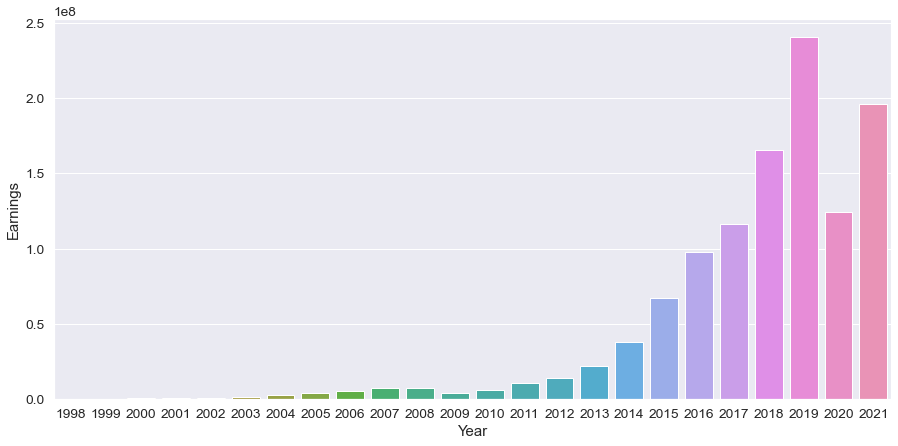

In [31]:
plt.figure(figsize = (15, 7))

sns.barplot(x = yearwise_earnings.index, y = yearwise_earnings.Earnings)

As we can see, the growth pattern here is different than the [pattern in the first dataset](#earnings1). This is because here, we are looking at the earnings being generated in each year by all the games and not just the ones released in that particular year.

Let's do the same for the no. of tournaments organized.

In [32]:
yearwise_tournaments = esports2.groupby('Year')[['Tournaments']].sum()
yearwise_tournaments

,Tournaments
Year,
1998,9
1999,16
2000,64
2001,63
2002,79
2003,187
2004,270
2005,330
2006,406


<AxesSubplot:xlabel='Year', ylabel='Tournaments'>

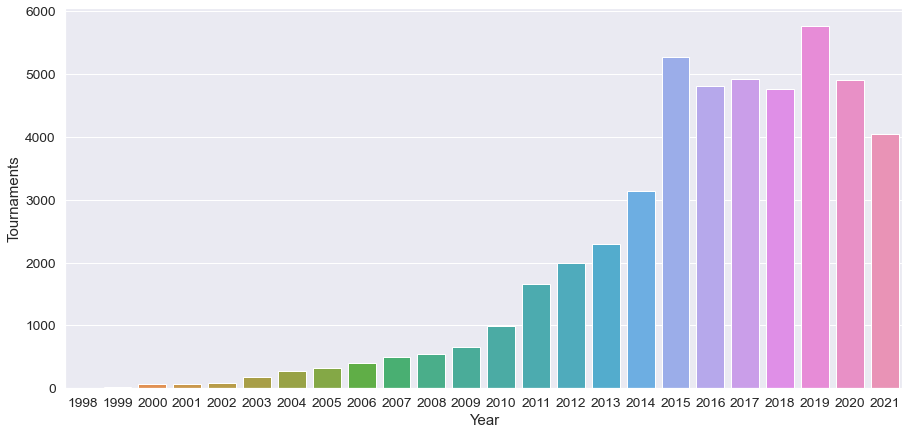

In [33]:
plt.figure(figsize = (15, 7))
sns.barplot(x = yearwise_tournaments.index, y = yearwise_tournaments.Tournaments)

The no. of tournaments kept rising with each year passing by and as esports industry kept growing. However, the no. of tournaments is on a decline for the last 2 years mainly because of COVID-19 pandemic situation.

###### Now, let's finally combine both the datasets on the basis of individual game titles.

In [34]:
combined_df = pd.merge(esports1, esports2, on = 'Game')
combined_df

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,Date,Earnings,Players,Tournaments,Year,Month
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99,1998-12-01,2000.00,1,1,1998,12
1,Age of Empires,1997,Strategy,191181.81,156839.89,261,99,2000-04-01,9500.00,4,1,2000,4
2,Age of Empires,1997,Strategy,191181.81,156839.89,261,99,2002-09-01,100.00,3,1,2002,9
3,Age of Empires,1997,Strategy,191181.81,156839.89,261,99,2003-05-01,625.00,4,1,2003,5
4,Age of Empires,1997,Strategy,191181.81,156839.89,261,99,2006-08-01,42.25,10,1,2006,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3,2016-04-01,60000.00,24,1,2016,4
7313,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3,2016-07-01,50000.00,32,1,2016,7
7314,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.00,0.00,6,1,2021-02-01,100.00,6,1,2021,2
7315,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2,2020-12-01,50000.00,48,2,2020,12


In [35]:
monthwise_earnings = combined_df.groupby(['Month', 'Year'])[['Earnings']].sum()
monthwise_earnings

Earnings
Month Year             
1     1998     15000.00
      2000     59156.02
      2001     30233.48
      2002      1000.00
      2003     19881.20
...                 ...
12    2017  10290599.66
      2018  14530670.98
      2019  23662233.33
      2020  12865708.99
      2021  14181759.55

[275 rows x 1 columns]

## The variation in the earnings for every month over the years.

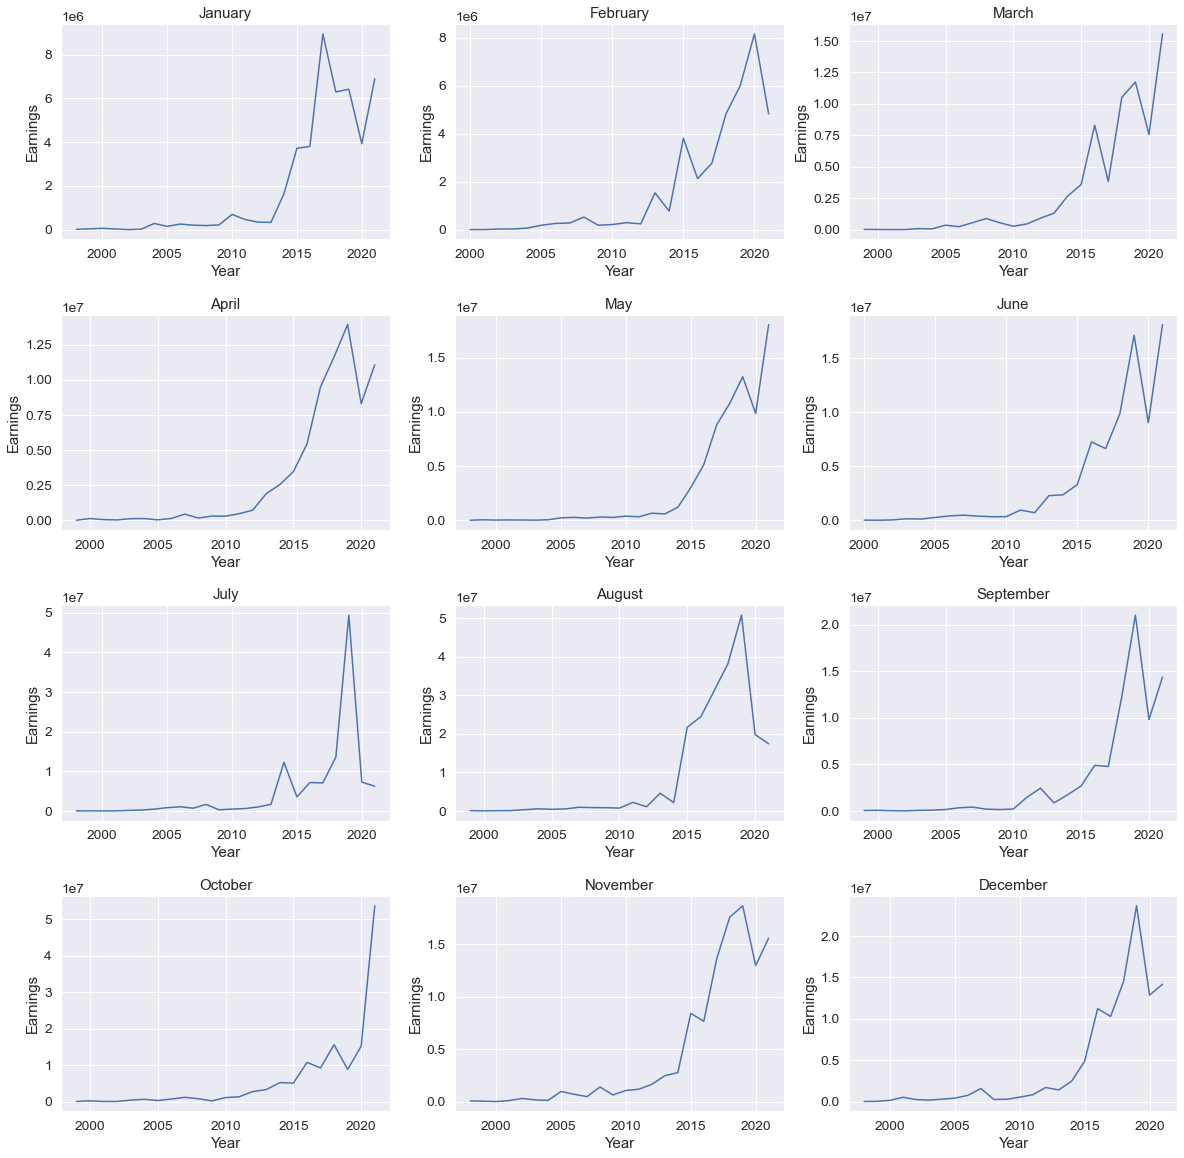

In [36]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
plt.subplots_adjust(hspace = 0.35)
month = 1
for axis in axes:
    for i in axis:
        curr_month = monthwise_earnings.xs(month, level = 'Month')
        i.plot(curr_month.index, curr_month.Earnings)
        i.set_title(calendar.month_name[month])
        i.set_xlabel('Year')
        i.set_ylabel('Earnings')
        month += 1

### From the above graphs, we can see the pattern in earnings generated in each month over the years.

### Key points to be noted - 
- **October** is on a steep rise since the year 2020 and hits the peak in terms of earnings out of all the months.
- **February, July and August** are the only months with their graphs going down. Out of these three, **Feb** is on the steepest downfall and has generated the least amount in terms of max earnings. The decline in **July** and **August** aren't that steep.
- Rest of the months have similar types of graphs with varying rises and declines. **November** and **December** are probably the most consistent ones out of these.

Let's try using the combined dataset for more analysis.

### We'll start by watching the variation in the earnings generated through each individual genre over the years. This time, we will use the monthwise earnings data from the second dataset.

In [37]:
genre_year_df = combined_df.groupby(['Genre', 'Year'])[['Earnings']].sum()
genre_year_df

Earnings
Genre                Year             
Battle Royale        2015    173328.00
                     2016    267244.00
                     2017   2259353.60
                     2018  29025022.40
                     2019  91223429.84
...                                ...
Third-Person Shooter 2017   1064000.00
                     2018   1022000.00
                     2019   1087250.00
                     2020   1273000.00
                     2021       100.00

[184 rows x 1 columns]

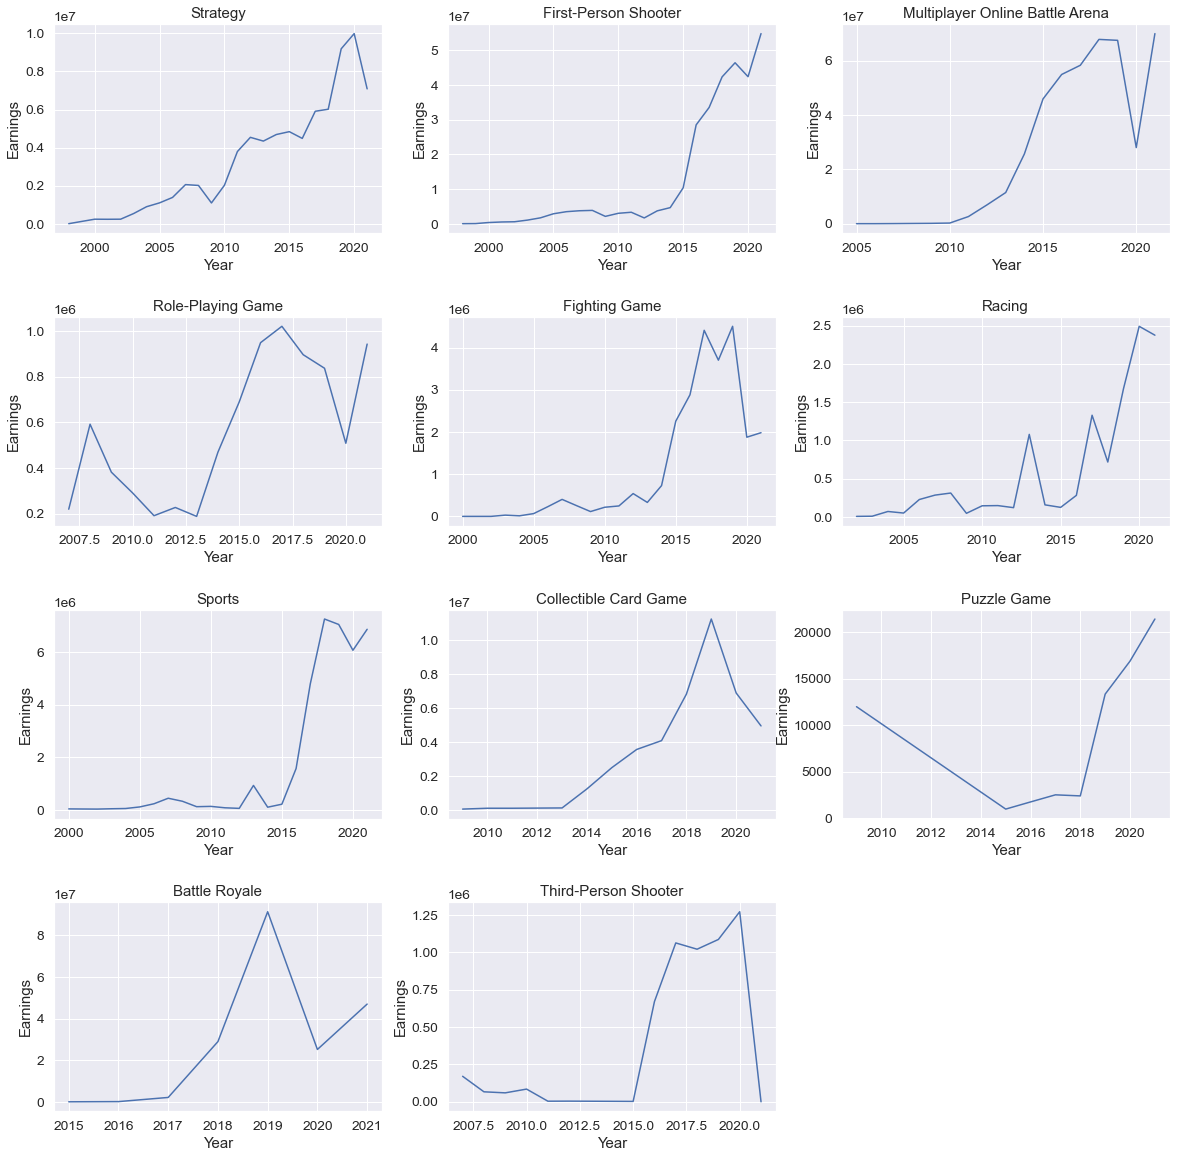

In [38]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
fig.delaxes(axes[3][2])
genre = 0
for axis in axes:
    for i in axis:
        try:
            df = genre_year_df.xs(esports1.Genre.unique()[genre], level = 'Genre')
            i.plot(df.index, df.Earnings)
            i.set_title(esports1.Genre.unique()[genre])
            i.set_xlabel('Year')
            i.set_ylabel('Earnings')
            genre += 1
        except:
            continue
plt.subplots_adjust(hspace = 0.4)

These plots are visibly different than the [ones](#strategy1plot) plotted using the first dataset.

### Key Takeaways

- **MOBA** - These games were the first ones that started hitting high numbers in terms of earnings. The only decline in the earnings came around 2020 which was because of COVID-19.
- **TPS(Third-Person Shooter)** - The earnings for these games have been on a decline since 2020 and no signs of any rise since then has been visible.
- **RPG(Role-Playing Games)** - These games have been on an alternate rise and decline path since the very beginning.
- **Puzzle Games** - These games had a similar pattern like the RPGs but the total earnings generated are the lowest.
- **Battle Royale** - The BR games originated late but went on to generate the highest earnings.
- The rest of the genres have a similar pattern with varied rise and falls.

In [39]:
combined_df.describe()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,Earnings,Players,Tournaments,Year,Month
count,7317.000000,7.317000e+03,7.317000e+03,7317.000000,7317.000000,7.317000e+03,7317.000000,7317.000000,7317.000000,7317.000000
mean,2009.790215,1.313645e+07,1.043094e+07,1102.495968,618.110838,1.554368e+05,53.249282,6.520705,2015.119311,6.677873
std,6.745480,4.107940e+07,3.572713e+07,2224.004780,1239.267518,1.027595e+06,120.841909,12.178698,4.966465,3.393054
min,1989.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1998.000000,1.000000
25%,2004.000000,1.035517e+05,6.042854e+04,92.000000,32.000000,9.336900e+02,5.000000,1.000000,2012.000000,4.000000
50%,2011.000000,8.450000e+05,5.235324e+05,279.000000,121.000000,8.818000e+03,15.000000,2.000000,2016.000000,7.000000
75%,2015.000000,5.811480e+06,4.466349e+06,1271.000000,628.000000,5.625000e+04,44.000000,6.000000,2019.000000,10.000000
max,2021.000000,2.769642e+08,2.552828e+08,14586.000000,6276.000000,4.012570e+07,1709.000000,172.000000,2021.000000,12.000000


The first dataset starts from the year 1989 in terms of release date and the second one starts from 1998 for the monthwise earnings data.

Let's try comparing the stats from the same time period from both datasets.

In [40]:
combined_df2 = pd.merge(esports1[esports1.ReleaseDate >= 1998], esports2, on = 'Game')
combined_df2

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,Date,Earnings,Players,Tournaments,Year,Month
0,Age of Empires II,1999,Strategy,2280004.9,720999.87,1508,1107,2000-01-01,35335.86,2,1,2000,1
1,Age of Empires II,1999,Strategy,2280004.9,720999.87,1508,1107,2000-02-01,450.00,5,1,2000,2
2,Age of Empires II,1999,Strategy,2280004.9,720999.87,1508,1107,2000-04-01,5015.00,1,1,2000,4
3,Age of Empires II,1999,Strategy,2280004.9,720999.87,1508,1107,2000-05-01,225.00,0,2,2000,5
4,Age of Empires II,1999,Strategy,2280004.9,720999.87,1508,1107,2000-06-01,1006.80,5,2,2000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.0,170000.00,39,3,2016-04-01,60000.00,24,1,2016,4
7108,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.0,170000.00,39,3,2016-07-01,50000.00,32,1,2016,7
7109,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.0,0.00,6,1,2021-02-01,100.00,6,1,2021,2
7110,Rogue Company,2020,Third-Person Shooter,50000.0,0.00,48,2,2020-12-01,50000.00,48,2,2020,12


In [41]:
combined_df2.describe()

,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,Earnings,Players,Tournaments,Year,Month
count,7112.000000,7.112000e+03,7.112000e+03,7112.000000,7112.000000,7.112000e+03,7112.000000,7112.000000,7112.000000,7112.000000
mean,2010.217098,1.351311e+07,1.072994e+07,1131.400169,634.772919,1.598415e+05,54.578740,6.668588,2015.103206,6.681524
std,6.336604,4.160650e+07,3.619439e+07,2249.158559,1253.041509,1.041969e+06,122.305361,12.320224,4.928718,3.391894
min,1998.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1998.000000,1.000000
25%,2005.000000,1.170267e+05,6.869281e+04,101.000000,36.000000,1.000000e+03,5.000000,1.000000,2012.000000,4.000000
50%,2011.000000,1.069314e+06,5.999729e+05,297.000000,126.000000,9.624870e+03,15.000000,2.000000,2016.000000,7.000000
75%,2015.000000,5.811480e+06,4.498605e+06,1281.000000,686.000000,6.000000e+04,46.000000,6.000000,2019.000000,10.000000
max,2021.000000,2.769642e+08,2.552828e+08,14586.000000,6276.000000,4.012570e+07,1709.000000,172.000000,2021.000000,12.000000


As we can see, the data varies a lot when both the datasets are combined because of the limitation of the first dataset to only the release year of any particular game.
<br>
So, we can say that these datasets can be analysed better separately.

## Let's create some questions from these datasets.

### Q.1. Can the esports industry be considered as a growing industry in terms of popularity?

The popularity of any industry can be described through the no. of people getting involved in its activities. SO, we will look for the same. We will find out the pattern in the no. of tournaments getting organized and the no. of players participating in the tournaments.

### Dataset-1

In [42]:
yearwise_pnt = esports1.groupby('ReleaseDate')[['TotalTournaments', 'TotalPlayers']].sum()
yearwise_pnt

,TotalTournaments,TotalPlayers
ReleaseDate,,
1981,0,0
1989,28,67
1993,10,32
1994,71,161
1995,17,37
1996,31,81
1997,132,330
1998,699,721
1999,1404,2180


Now, let's plot these stats on some graphs.

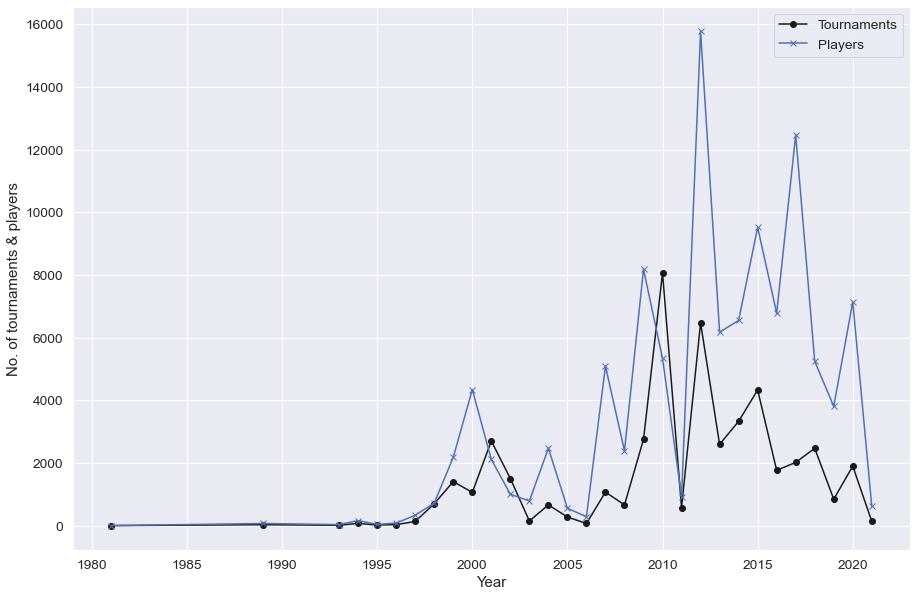

In [43]:
plt.figure(figsize = (15, 10))

plt.plot(yearwise_pnt.index, yearwise_pnt.TotalTournaments, 'k-o')
plt.plot(yearwise_pnt.index, yearwise_pnt.TotalPlayers, 'b-x')
plt.xlabel('Year')
plt.ylabel('No. of tournaments & players')
plt.legend(['Tournaments', 'Players'], loc = 'best')

The no. of tournaments and players have been rising throughout the years with major fluctuations alongside. The no. of players involved has risen more than the no. of tournaments which is quite understandable because each tournament consists of several no. of players.
<br>
The final decline in both the numbers is mainly because of the COVID-19 situation.

### Dataset-2

Now, let's see what the second dataset has to offer on this.

In [44]:
yearwise_pnt1 = esports2.groupby(['Year'])[['Players', 'Tournaments']].sum()
yearwise_pnt1

,Players,Tournaments
Year,,
1998,43,9
1999,82,16
2000,347,64
2001,574,63
2002,753,79
2003,1502,187
2004,2491,270
2005,2936,330
2006,3870,406


Now, let's plot these as well.

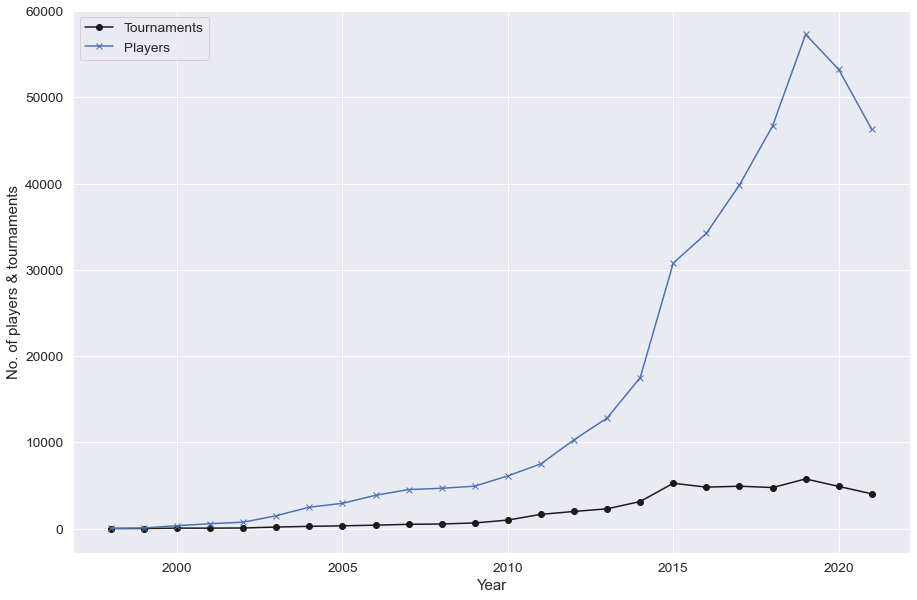

In [45]:
plt.figure(figsize = (15, 10))

plt.plot(yearwise_pnt1.index, yearwise_pnt1.Tournaments, 'k-o')
plt.plot(yearwise_pnt1.index, yearwise_pnt1.Players, 'b-x')
plt.xlabel('Year')
plt.ylabel('No. of players & tournaments')
plt.legend(['Tournaments', 'Players'], loc = 'best')

In the case of this plot, we can see a subtle or minor growth in terms of no. of tournaments but a considerable growth in terms of no. of players participating in the tournaments.
<br>
This shows that even though the tournaments are lesser in number but they are major tournaments that involve high number of players.

### So, from the above inferences, we can actually say that the esports industry is progressing, quite fast as well and a lot of people are recognizing esports as a profession. This is a good sign for the people actually interested in using their gaming skills professionally.

### Q.2. Which genre of games has the most no. of new releases in the last decade (2011-2020)?

We'll filter out the data from our first dataset for the given time period.

In [46]:
releases = esports1.groupby(['ReleaseDate', 'Genre'])[['Game']].count()
releases

Game
ReleaseDate Genre                                
1981        Puzzle Game                         1
1989        Puzzle Game                         1
1993        Fighting Game                       1
            Sports                              1
1994        Fighting Game                       2
...                                           ...
2021        Multiplayer Online Battle Arena     1
            Racing                              2
            Sports                              1
            Strategy                            2
            Third-Person Shooter                1

[170 rows x 1 columns]

In [47]:
filtered_releases = releases.loc[2011:2020]
filtered_releases

Game
ReleaseDate Genre                                
2011        Fighting Game                       6
            First-Person Shooter                3
            Multiplayer Online Battle Arena     2
            Puzzle Game                         2
            Racing                              2
...                                           ...
2020        Puzzle Game                         4
            Racing                              3
            Sports                              2
            Strategy                            4
            Third-Person Shooter                1

[81 rows x 1 columns]

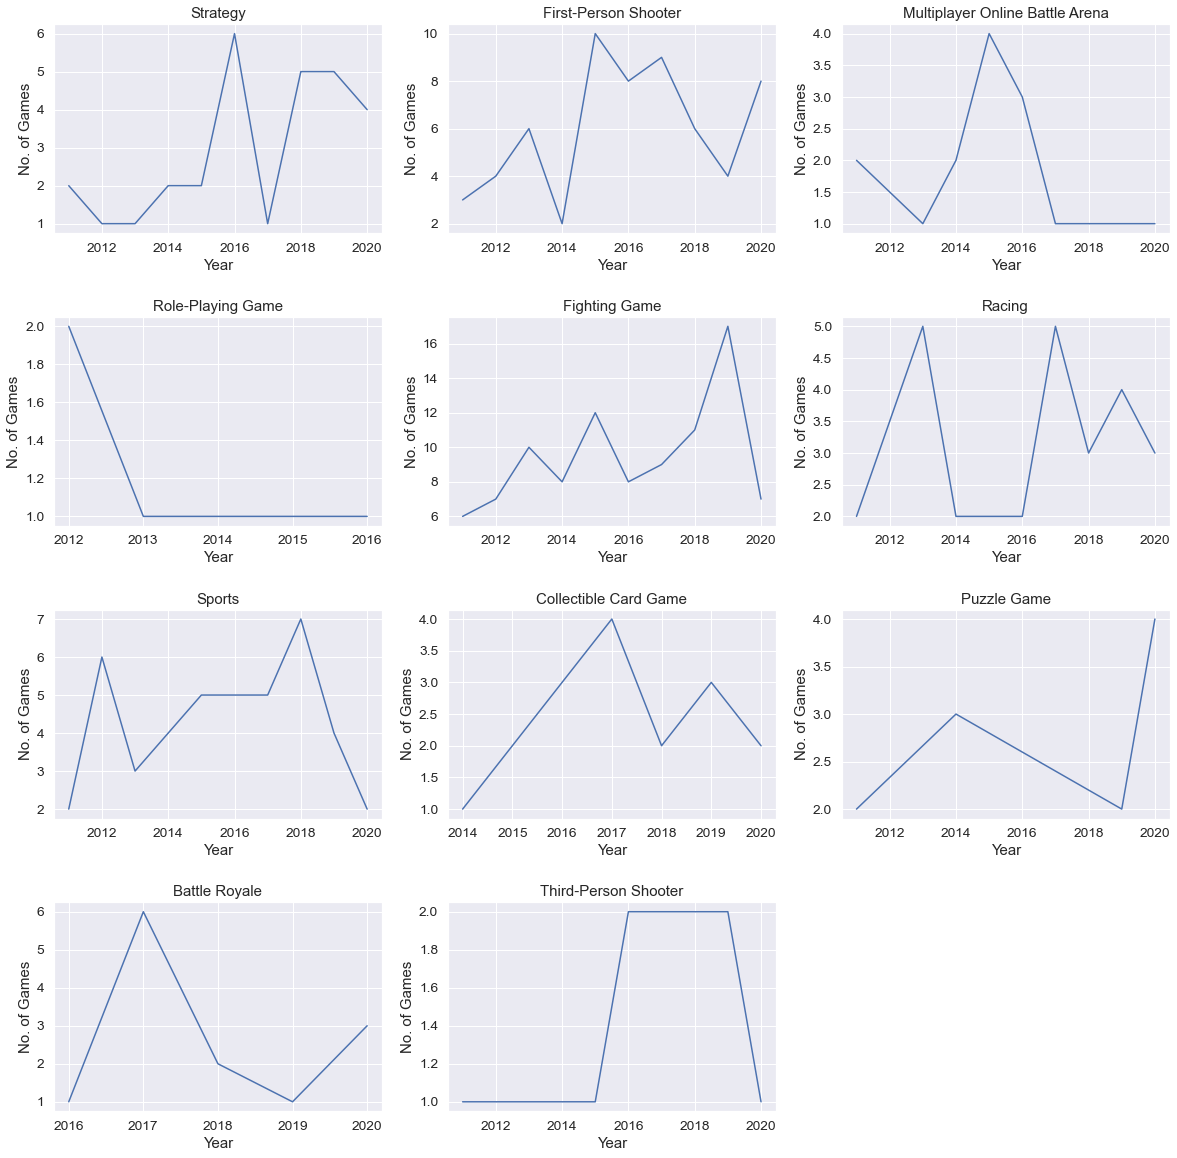

In [48]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))

fig.delaxes(axes[3][2])
genre = 0
for axis in axes:
    for i in axis:
        try:
            curr_gen = esports1.Genre.unique()[genre]
            df = filtered_releases.xs(curr_gen, level = 'Genre')
            i.plot(df.index, df.Game)
            i.set_title(curr_gen)
            i.set_ylabel('No. of Games')
            i.set_xlabel('Year')
            genre += 1
        except:
            continue
plt.subplots_adjust(hspace = 0.4)

For the total no. of games:

In [49]:
no_of_releases =  esports1[np.logical_and(esports1.ReleaseDate >= 2011, esports1.ReleaseDate <= 2020)].groupby(['Genre'])[['Game']].count()
no_of_releases

,Game
Genre,
Battle Royale,13
Collectible Card Game,15
Fighting Game,95
First-Person Shooter,60
Multiplayer Online Battle Arena,16
Puzzle Game,11
Racing,28
Role-Playing Game,4
Sports,43


In [50]:
no_of_releases.sort_values('Game', ascending = False)

,Game
Genre,
Fighting Game,95
First-Person Shooter,60
Sports,43
Strategy,29
Racing,28
Multiplayer Online Battle Arena,16
Collectible Card Game,15
Battle Royale,13
Puzzle Game,11


Fighting games and FPS lead the way in terms of new releases in the last decade.

### Q.3. What are the overall top-10 earning games?

We will calculate this using both the datasets as well.

### Dataset-1

In [51]:
top1 = esports1.sort_values('TotalEarnings', ascending = False)[['Game', 'TotalEarnings']].head(10).reset_index(drop = True)
top1

,Game,TotalEarnings
0,Dota 2,2.769642e+08
1,Counter-Strike: Global Offensive,1.287094e+08
2,Fortnite,1.111593e+08
3,League of Legends,8.967189e+07
4,PLAYERUNKNOWN�S BATTLEGROUNDS,4.282552e+07
5,Arena of Valor,3.893482e+07
6,StarCraft II,3.607249e+07
7,Overwatch,3.221316e+07
8,Hearthstone,2.668937e+07
9,PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,2.489018e+07


<AxesSubplot:xlabel='TotalEarnings', ylabel='Game'>

C:\Users\kusha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kusha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


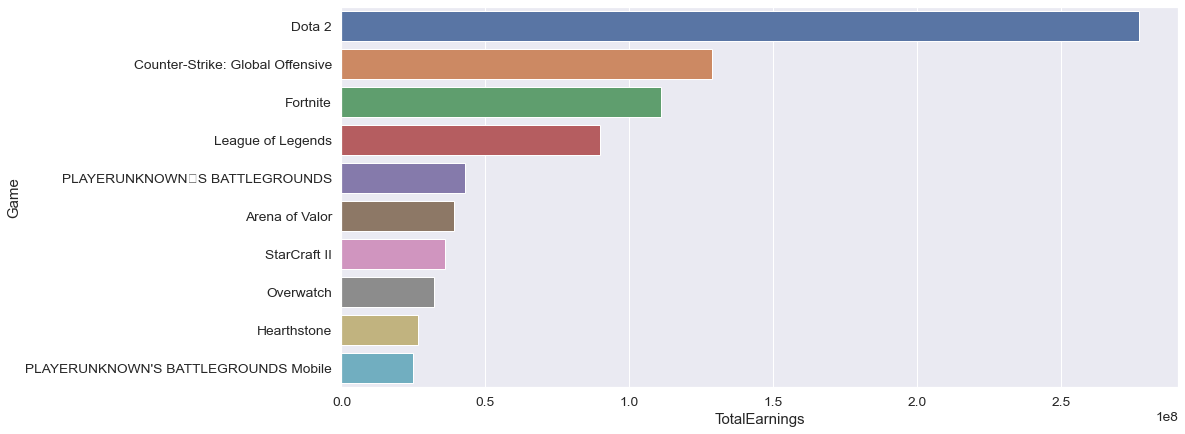

In [52]:
plt.figure(figsize = (15, 7))

sns.barplot(x = top1.TotalEarnings, y = top1.Game)

### Dataset-2

In [55]:
top2 = esports2.groupby('Game')[['Earnings']].sum().sort_values('Earnings', ascending = False).head(10)
top2

,Earnings
Game,
Dota 2,2.769642e+08
Counter-Strike: Global Offensive,1.287666e+08
Fortnite,1.111593e+08
League of Legends,8.967189e+07
PLAYERUNKNOWN�S BATTLEGROUNDS,4.282552e+07
Arena of Valor,3.893482e+07
StarCraft II,3.607309e+07
Overwatch,3.221316e+07
Hearthstone,2.668937e+07


<AxesSubplot:xlabel='Earnings', ylabel='Game'>

C:\Users\kusha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kusha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


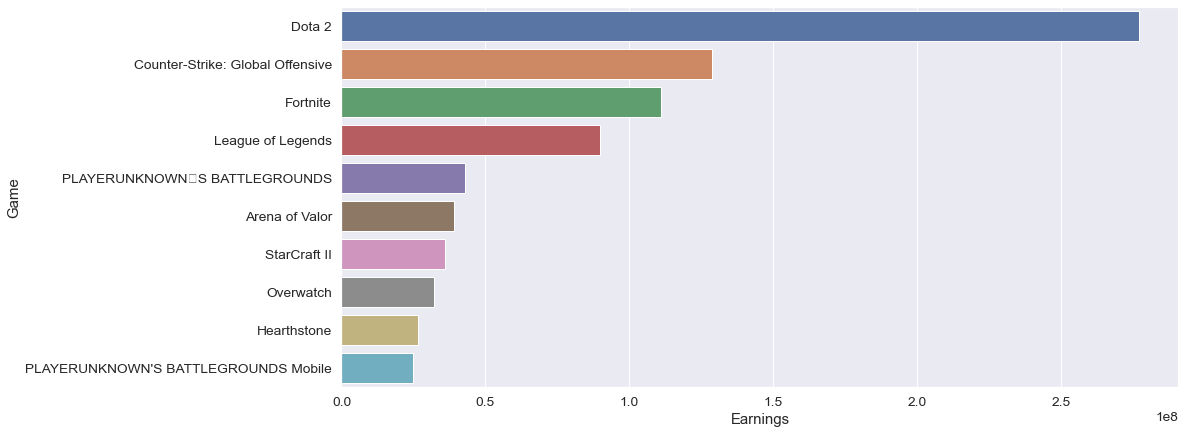

In [56]:
plt.figure(figsize = (15, 7))

sns.barplot(x = top2.Earnings, y = top2.index)

As we can see, we got the same graphs and similar values from both the datasets and now we know the top-10 earning games according to the given data.

<div class="alert alert-block alert-warning">
    <b>Note:</b> The warnings for fonts are popping up because of the symbol used in the name of PLAYERUNKNOWN'S BATTLEGROUNDS that the notebook can't identify.
</div>

# Inferences and Conclusions

### After all the analysis performed above, we can actually say that the esports industry is on an actual rise and is becoming an eye-catching field as well.

### Apart from that, the esports tournaments aren't limited to any particular genre and shows high variety in terms of genre making it accessible and favourable for people with varied gaming interests and skillsets.

### Another interesting fact that I can confirm with my gaming knowledge myself is that console or PC games generate considerably high earnings compared to mobile games as the only mobile game catching any considerable attention in terms of esports has been just PUBG: MOBILE.